# Data Question 1: An Exploration of UN data

### Import the required packages with their customary aliases

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Jupyter magic so we don't have to call plt.show() every time
%matplotlib inline

### Read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 10 rows.

In [2]:
# Pandas Dataframe
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


Ok, it looks good.

### Look at the last 5 rows. Do you see a problem?

In [3]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


Oh-oh! It looks like we got some bad data at the end of the data frame! This is the footer and we do not need them! Let's correct this!

### Redo the `read_csv()` call to correct this issue - do not modify the original csv file.

In [4]:
# Re-importing and skipping the last 2 rows
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2, engine="python") # gdp_df = gdp_df[:-2]
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


### Drop the `Value Footnotes` column, and rename the remaining columns

In [5]:
# Deleting the "Value Footnotes" column
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.columns = ["Country", "Year", "GDP_Per_Capita"]
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


### How many rows and columns does `gdp_df` have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

Let's look at some information about this dataframe

In [15]:
# Looking at rows and columns
gdp_df.shape

(6729, 3)

In [6]:
# Information about the dataframe
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


- The dataframe has 6729 rows x 3 columns
- Datatypes of columns:
  - Country or Area: String
  - Year: Integer numbers
  - Value: Floating point numbers

### Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [7]:
# Years and Nobs per year
count_of_years = len(gdp_df['Year'].value_counts())

print("How many years are represented? {}".format(count_of_years))
display(gdp_df['Year'].value_counts().sort_index())

How many years are represented? 29


1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

We notice that the years are not equally represented

### How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [8]:
# Countries and Nobs per countries
count_countries = len(gdp_df['Country'].value_counts())

print("How many countries are represented? {}".format(count_countries))
display(gdp_df['Country'].value_counts().sort_values())

How many countries are represented? 243


Djibouti                      1
South Sudan                   8
Turks and Caicos Islands      8
Sint Maarten (Dutch part)     9
Nauru                        12
                             ..
Antigua and Barbuda          29
Dominican Republic           29
Costa Rica                   29
South Africa                 29
Seychelles                   29
Name: Country, Length: 243, dtype: int64

It looks like these countries are very small countries and might have not have the required resources to run the statistical studies of their GDP multiple times...

### Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [9]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


### Use `.describe()` to find the summary statistics for GDP per capita in 2014.

In [10]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


### Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

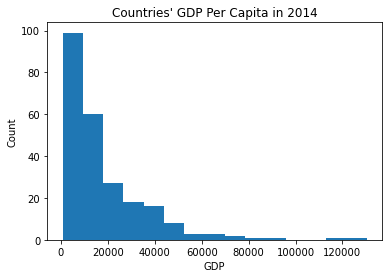

In [11]:
plt.hist(x=gdp_2014["GDP_Per_Capita"], bins=np.int(np.sqrt(gdp_2014["GDP_Per_Capita"].shape[0])))
plt.title("Countries' GDP Per Capita in 2014");
plt.xlabel("GDP")
plt.ylabel("Count");

This distribution is right-skewed. There is a lot of countries with low GDP and few countries with high GDP.

### Find the top 5 countries and bottom 5 countries by GDP per capita in 2014.

In [12]:
# Top 5 countries
gdp_2014.nlargest(5, "GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [13]:
# Bottom 5 countries
gdp_2014.nsmallest(5, "GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


### Pivot the data for 1990 and 2017

In [14]:
gdp_df.pivot_table(
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,)

ValueError: No group keys passed!